               Date          LV     Speed  Theoretical      Direct
0  01 01 2018 00:00  380.047791  5.311336   416.328908  259.994904
1  01 01 2018 00:10  453.769196  5.672167   519.917511  268.641113
2  01 01 2018 00:20  306.376587  5.216037   390.900016  272.564789
3  01 01 2018 00:30  419.645905  5.659674   516.127569  271.258087
4  01 01 2018 00:40  380.650696  5.577941   491.702972  265.674286
Coefficients: [311.52091199  -0.42976839]
Intercept: -1017.4176758476212
Mean Squared Error: 217404.1034722402
Mean Absolute Error: 330.90703962971
R-squared: 0.8649542823812045
Columns in X_train: Index(['Speed', 'Direct'], dtype='object')
Columns in X_test: Index(['Speed', 'Direct'], dtype='object')
Data types in X_train: Speed     float64
Direct    float64
dtype: object
Data types in X_test: Speed     float64
Direct    float64
dtype: object


/Users/shakthivelk/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


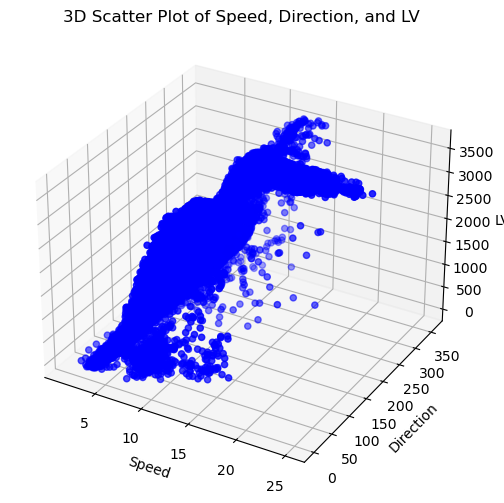

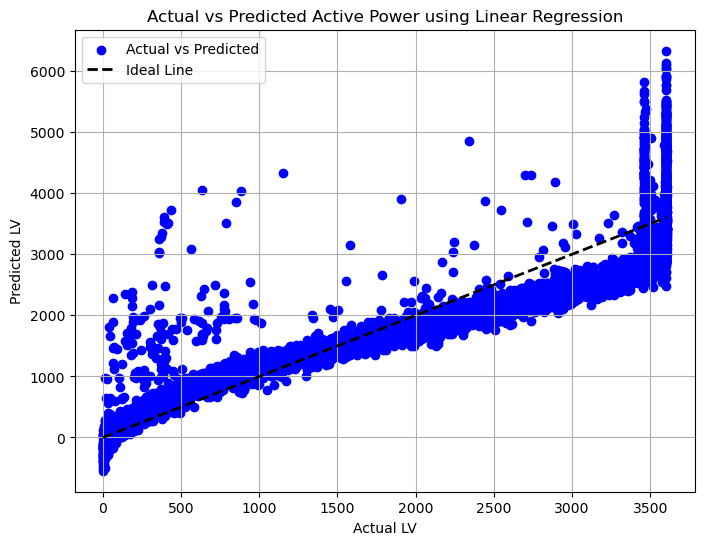

In [14]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import json
import warnings
from sklearn.exceptions import ConvergenceWarning



# Read the input data written by Node.js
with open('input_data.json', 'r') as file:
    input_data = json.load(file)

# Extract wind speed and wind direction as floats
wind_speed = input_data['windSpeed']
wind_direction=input_data['windDirection']

wind_speed*=0.277778

# Load the dataset
data = pd.read_csv("T1.csv")
# Assuming your DataFrame is 'data' and columns are unnamed
data.columns = ['Date','LV','Speed','Theoretical','Direct']
#Exploring the data:

print(data.head())


# Data preprocessing
data = data[data['LV'] > 0]
data = data.dropna()

# Preparing the data
X = data[['Speed', 'Direct']]
y = data['LV']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Building the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating the model, calculating metrics
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the metrics
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Check columns in X_train and X_test
print("Columns in X_train:", X_train.columns)
print("Columns in X_test:", X_test.columns)

# Check data types of columns in X_train and X_test
print("Data types in X_train:", X_train.dtypes)
print("Data types in X_test:", X_test.dtypes)


# Saving the model
with open('predict.pkl', 'wb') as file:
    pickle.dump(model, file)

# Perform prediction
prediction = model.predict([[wind_speed, wind_direction]])

# Write the prediction result to a file
output_data = {'prediction': float(prediction)}
with open('output_data.json', 'w') as file:
    json.dump(output_data, file)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from mpl_toolkits.mplot3d import Axes3D

# Assuming 'data' contains your dataset with columns 'Speed', 'Direct', and 'LV'
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(data['Speed'], data['Direct'], data['LV'], c='blue', marker='o')

# Set labels and title
ax.set_xlabel('Speed')
ax.set_ylabel('Direction')
ax.set_zlabel('LV')
ax.set_title('3D Scatter Plot of Speed, Direction, and LV')

plt.show()


# Assuming you have already trained your linear regression model and made predictions
# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Line')

plt.xlabel('Actual LV')
plt.ylabel('Predicted LV')
plt.title('Actual vs Predicted Active Power using Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

